In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [165]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [166]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
sub = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [167]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [168]:
# train.describe()

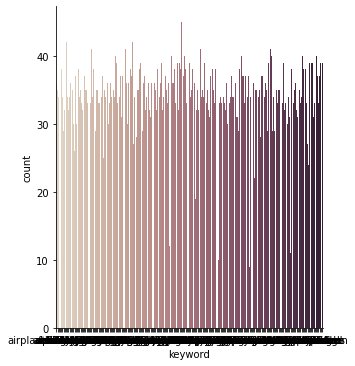

In [169]:
sns.catplot(x="keyword", kind="count", palette="ch:.25", data=train)


<AxesSubplot:>

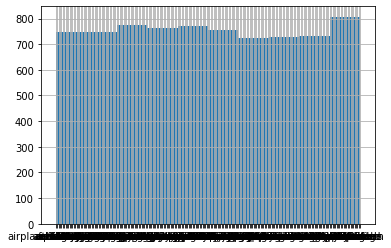

In [170]:
train['keyword'].hist()

In [171]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [172]:
train.drop('location',inplace=True, axis=1)
test.drop('location',inplace=True, axis=1)

In [173]:
train.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [174]:
for i in range (len(train['text'])):
    train['text'][i] = train['text'][i].lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
for i in range (len(test['text'])):
    test['text'][i] = test['text'][i].lower()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [176]:
y=train['target']

<AxesSubplot:>

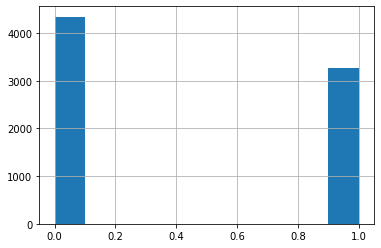

In [177]:
y.hist()

In [178]:
train.drop('target',inplace=True, axis=1)
train.drop('id',inplace=True, axis=1)

In [179]:
train.head()

,keyword,text
0,NaN,our deeds are the reason of this #earthquake m...
1,NaN,forest fire near la ronge sask. canada
2,NaN,all residents asked to 'shelter in place' are ...
3,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,just got sent this photo from ruby #alaska as ...


In [180]:
# train['text'][:] =re.sub('[^A-Za-z]+', ' ', train['text'][:])
# train['text'][2]


for i in range (len(train['text'])):
    train['text'][i] =re.sub('[^A-Za-z]+', ' ', train['text'][i])

In [181]:

for i in range (len(test['text'])):
    test['text'][i] =re.sub('[^A-Za-z]+', ' ', test['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [182]:
train.head()

,keyword,text
0,NaN,our deeds are the reason of this earthquake ma...
1,NaN,forest fire near la ronge sask canada
2,NaN,all residents asked to shelter in place are be...
3,NaN,people receive wildfires evacuation orders in...
4,NaN,just got sent this photo from ruby alaska as s...


In [183]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
 
stop_words = set(stopwords.words('english'))
word_tokens =[]
filtered_sentence=[]
sentence=[]
for i in range(len (train['text'])):
    word_tokens.append(word_tokenize(train['text'][i]))

#     print(word_tokens)

    filtered_sentence.append([w for w in word_tokens[i] if not w.lower() in stop_words])


    sentence.append( "" )

    for w in word_tokens[i]:
        if w not in stop_words:
            sentence[i]=sentence[i]+' '+w
#             sentence[i].append(w)
 
#     print(word_tokens)
#     print(filtered_sentence)

In [184]:
for i in range(len(train['text'])):
    train['text'][i] =sentence[i]

In [185]:
train.head()

,keyword,text
0,NaN,deeds reason earthquake may allah forgive us
1,NaN,forest fire near la ronge sask canada
2,NaN,residents asked shelter place notified office...
3,NaN,people receive wildfires evacuation orders ca...
4,NaN,got sent photo ruby alaska smoke wildfires po...


In [186]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
example_sent = """This is a sample sentence,
                  showing off the stop words filtration."""
 
stop_words = set(stopwords.words('english'))
word_tokens =[]
filtered_sentence=[]
sentence=[]
for i in range(len (test['text'])):
    word_tokens.append(word_tokenize(test['text'][i]))

#     print(word_tokens)

    filtered_sentence.append([w for w in word_tokens[i] if not w.lower() in stop_words])

    sentence.append( "" )

    for w in word_tokens[i]:
        if w not in stop_words:
            sentence[i]=sentence[i]+' '+w
 
#     print(word_tokens)
#     print(filtered_sentence)

In [187]:
for i in range(len(test['text'])):
    test['text'][i] =sentence[i]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [188]:
test.head()

,id,keyword,text
0,0,NaN,happened terrible car crash
1,2,NaN,heard earthquake different cities stay safe e...
2,3,NaN,forest fire spot pond geese fleeing across st...
3,9,NaN,apocalypse lighting spokane wildfires
4,11,NaN,typhoon soudelor kills china taiwan


In [189]:
for i in range(len(train['text'])):
    train['text'][i]=word_tokenize(train['text'][i])

In [190]:
for i in range(len(test['text'])):
    test['text'][i]=word_tokenize(test['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
train['text'][:5]

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, shelter, place, notified, o...
3    [people, receive, wildfires, evacuation, order...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: text, dtype: object

In [192]:
word_tokens[0]

['just', 'happened', 'a', 'terrible', 'car', 'crash']

In [193]:
sentences=[]

In [194]:
for i in range(len(train['text'])):
#     bullocks=[]
    sentences.append(train['text'][i])
#     sentences.append(bullocks)

In [195]:
for i in range(len(test['text'])):
#     bullocks=[]
    sentences.append(train['text'][i])
#     sentences.append(bullocks)

In [196]:
sentences[:5]

[['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us'],
 ['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada'],
 ['residents',
  'asked',
  'shelter',
  'place',
  'notified',
  'officers',
  'evacuation',
  'shelter',
  'place',
  'orders',
  'expected'],
 ['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california'],
 ['got',
  'sent',
  'photo',
  'ruby',
  'alaska',
  'smoke',
  'wildfires',
  'pours',
  'school']]

In [197]:
import json
import os
import re
import string
import numpy as np

from gensim.models import Word2Vec

In [198]:
model1 =Word2Vec(sentences, vector_size=100, window=15, min_count=1,sg=0)
#model2 =Word2Vec.load('bn_w2v_model.text')
model1.wv.save_word2vec_format("myword2vec_model.txt")
model1.wv["deeds"]

array([ 2.5843875e-03,  5.3658597e-03, -2.0797958e-03,  9.4502829e-03,
        6.3396972e-03, -2.1965738e-02, -5.0662085e-03,  3.8043555e-02,
        1.2088589e-04, -1.6241290e-02,  7.7509023e-03, -1.3639359e-02,
        2.0243137e-03,  1.5154203e-02,  1.2000467e-02, -1.3563873e-02,
        9.8113557e-03, -5.7769003e-03, -1.1605559e-02, -2.5930295e-02,
        1.7213264e-02,  1.5444945e-03,  1.1111881e-02,  7.4691174e-04,
       -3.7430325e-03, -1.7170685e-03, -1.8504669e-03,  1.1573455e-02,
       -2.9087842e-03, -2.9224413e-03, -1.0727342e-02, -2.8857668e-03,
        4.8154863e-03, -9.5494529e-03, -3.2536725e-03,  6.3650641e-03,
        7.7409050e-03, -1.8781957e-03, -5.9935176e-03, -7.4133584e-03,
        6.5070610e-03, -6.8571982e-03, -9.5500145e-03,  6.3790102e-03,
        1.0870492e-02, -1.2006577e-02,  3.8056232e-03, -8.0578374e-03,
        3.5995576e-03,  1.6812503e-02,  1.8312471e-02, -1.3375592e-02,
       -1.0374905e-02,  4.1884719e-03, -1.0838575e-02,  1.2476215e-03,
      

In [199]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=15000)
tokenizer.fit_on_texts(train['text'])

train['text'] = tokenizer.texts_to_sequences(train['text'])
test['text'] = tokenizer.texts_to_sequences(test['text'])

In [200]:
train.head()

,keyword,text
0,NaN,"[4599, 731, 172, 75, 1468, 4600, 24]"
1,NaN,"[117, 6, 147, 593, 6870, 6871, 1072]"
2,NaN,"[1599, 1469, 1792, 571, 6872, 1600, 173, 1792,..."
3,NaN,"[12, 4601, 1355, 173, 1259, 31]"
4,NaN,"[29, 1073, 236, 6873, 1601, 184, 1355, 6874, 112]"


In [201]:
# for i in range (len(test['keyword'])):
#     test['keyword'][i] =re.sub('[^A-Za-z]+', ' ', test['keyword'][i])

In [202]:
# train['keyword'] = tokenizer.texts_to_sequences(train['keyword'])


In [203]:
test.head()

,id,keyword,text
0,0,NaN,"[778, 1815, 66, 35]"
1,2,NaN,"[383, 172, 1056, 2561, 503, 1928, 142]"
2,3,NaN,"[117, 6, 691, 3518, 5134, 733, 617, 259]"
3,9,NaN,"[363, 3885, 7554, 1355]"
4,11,NaN,"[137, 589, 361, 245, 1061]"


In [204]:
from sklearn.preprocessing import LabelEncoder

l_encoder=LabelEncoder()
train['keyword'] =l_encoder.fit_transform(train['keyword'] )

train['keyword'] 

0       221
1       221
2       221
3       221
4       221
       ... 
7608    221
7609    221
7610    221
7611    221
7612    221
Name: keyword, Length: 7613, dtype: int64

In [205]:
from sklearn.preprocessing import LabelEncoder

l_encoder=LabelEncoder()
test['keyword'] =l_encoder.fit_transform(test['keyword'] )

test['keyword'] 

0       221
1       221
2       221
3       221
4       221
       ... 
3258    221
3259    221
3260    221
3261    221
3262    221
Name: keyword, Length: 3263, dtype: int64

In [206]:
train['keyword'][100:200]

100    1
101    1
102    2
103    2
104    2
      ..
195    4
196    4
197    4
198    4
199    4
Name: keyword, Length: 100, dtype: int64

In [207]:
# import gensim.downloader

# glove_vectors = gensim.downloader.load('glove-twitter-200')

In [208]:
for i in range (len(test['text'])):
    test['text'][i].insert(0,test['keyword'][i])
    
test.head()

,id,keyword,text
0,0,221,"[221, 778, 1815, 66, 35]"
1,2,221,"[221, 383, 172, 1056, 2561, 503, 1928, 142]"
2,3,221,"[221, 117, 6, 691, 3518, 5134, 733, 617, 259]"
3,9,221,"[221, 363, 3885, 7554, 1355]"
4,11,221,"[221, 137, 589, 361, 245, 1061]"


In [209]:
for i in range (len(train['text'])):
    train['text'][i].insert(0,train['keyword'][i])
    
train.head()

,keyword,text
0,221,"[221, 4599, 731, 172, 75, 1468, 4600, 24]"
1,221,"[221, 117, 6, 147, 593, 6870, 6871, 1072]"
2,221,"[221, 1599, 1469, 1792, 571, 6872, 1600, 173, ..."
3,221,"[221, 12, 4601, 1355, 173, 1259, 31]"
4,221,"[221, 29, 1073, 236, 6873, 1601, 184, 1355, 68..."


In [210]:
train.drop('keyword',inplace=True, axis=1)
test.drop('keyword',inplace=True, axis=1)


In [211]:
train.head()

,text
0,"[221, 4599, 731, 172, 75, 1468, 4600, 24]"
1,"[221, 117, 6, 147, 593, 6870, 6871, 1072]"
2,"[221, 1599, 1469, 1792, 571, 6872, 1600, 173, ..."
3,"[221, 12, 4601, 1355, 173, 1259, 31]"
4,"[221, 29, 1073, 236, 6873, 1601, 184, 1355, 68..."


In [212]:
train_x=train['text']
test_x=test['text']

In [213]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('myword2vec_model.txt')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float64')

    embeddings_dictionary [word] = vector_dimensions
glove_file.close()


embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():

    embedding_vector = embeddings_dictionary.get(word)

    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [214]:
embedding_matrix[5]

array([ 0.03624808,  1.375986  ,  0.4434592 , -0.1291052 ,  0.67653286,
       -2.2252734 ,  0.8220044 ,  4.585835  , -1.0138069 , -2.3956382 ,
        0.04853838, -3.6767013 , -1.107905  ,  0.78323567,  0.7045392 ,
       -1.5049005 ,  1.0867928 , -1.6237291 , -0.47748554, -3.1449578 ,
        2.1674628 ,  0.6381265 ,  2.1264982 , -1.2531161 ,  0.75920194,
        0.75765425, -0.7900462 ,  0.4482065 , -1.4546212 , -0.3042676 ,
       -0.20430683, -1.1584742 ,  0.75764406, -0.9091453 , -1.1266885 ,
        1.8263742 ,  1.4439226 , -0.86280906, -1.2760212 , -1.541977  ,
        0.5020143 , -1.9958177 , -1.248924  ,  0.24202915,  1.7411273 ,
       -0.49723998, -0.8959548 , -0.08521345,  1.1359831 ,  1.2493397 ,
        2.3692791 , -2.102856  , -0.29452315, -0.60385686, -0.7087852 ,
       -1.4501365 ,  0.8216071 ,  0.04143672, -2.0088933 ,  1.8580257 ,
       -0.6178384 , -0.15046038, -0.9468113 ,  0.12068059, -1.3090597 ,
        2.1380577 ,  0.9987007 ,  0.08961423, -1.0712255 ,  2.06

In [215]:
from keras.preprocessing.sequence import pad_sequences

vocab_size = len(tokenizer.word_index) + 1
maxlen=100

train_x = pad_sequences(train_x, padding='post', maxlen=maxlen)
test_x = pad_sequences(test_x, padding='post', maxlen=maxlen)

In [216]:
from keras import Sequential, optimizers
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional,ConvLSTM2D,GRU,SimpleRNN,RNN
from keras import regularizers

model2 = Sequential()
embedding_layer = Embedding(vocab_size, 100,weights=[embedding_matrix], input_length=maxlen , trainable=True)
model2.add(embedding_layer)

model2.add (Bidirectional(LSTM(64,  return_sequences=True,kernel_regularizer=regularizers.l2(0.2))))

model2.add(Conv1D(32, 4, activation='relu'))
model2.add (LSTM(32,return_sequences=True, activation = 'tanh') )

model2.add(Conv1D(16, 4, activation='relu'))

model2.add(GlobalMaxPooling1D())

model2.add (Dropout(0.4))

model2.add(Dense(16,activation='relu'))


model2.add(Dense(1, activation='sigmoid'))


opt = optimizers.Adam(learning_rate=0.0005)
#lr=0.0005
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['acc'])



In [217]:
model2.build()
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          2197700   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100, 128)          84480     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 97, 32)            16416     
_________________________________________________________________
lstm_9 (LSTM)                (None, 97, 32)            8320      
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 94, 16)            2064      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 16)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)               

In [218]:
history = model2.fit(train_x, y, batch_size=128, epochs=20, verbose=1, validation_split=0.10)


Epoch 1/20
54/54 [==============================] - 30s 440ms/step - loss: 50.1483 - acc: 0.5564 - val_loss: 30.2965 - val_acc: 0.5341
Epoch 2/20
54/54 [==============================] - 18s 342ms/step - loss: 25.8373 - acc: 0.5892 - val_loss: 15.1746 - val_acc: 0.6785
Epoch 3/20
54/54 [==============================] - 16s 304ms/step - loss: 12.8728 - acc: 0.6147 - val_loss: 7.4387 - val_acc: 0.6391
Epoch 4/20
54/54 [==============================] - 16s 299ms/step - loss: 6.2897 - acc: 0.6306 - val_loss: 3.7211 - val_acc: 0.4751
Epoch 5/20
54/54 [==============================] - 16s 304ms/step - loss: 3.2101 - acc: 0.5343 - val_loss: 1.9806 - val_acc: 0.6732
Epoch 6/20
54/54 [==============================] - 16s 293ms/step - loss: 1.7498 - acc: 0.6159 - val_loss: 1.2094 - val_acc: 0.6535
Epoch 7/20
54/54 [==============================] - 16s 293ms/step - loss: 1.1117 - acc: 0.6303 - val_loss: 0.8790 - val_acc: 0.6601
Epoch 8/20
54/54 [==============================] - 17s 307ms/st

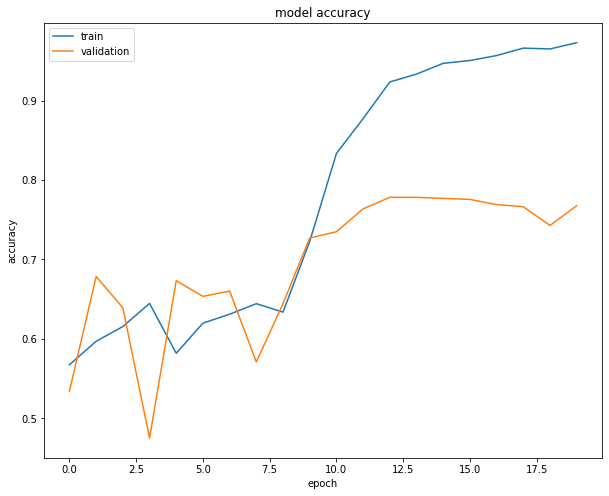

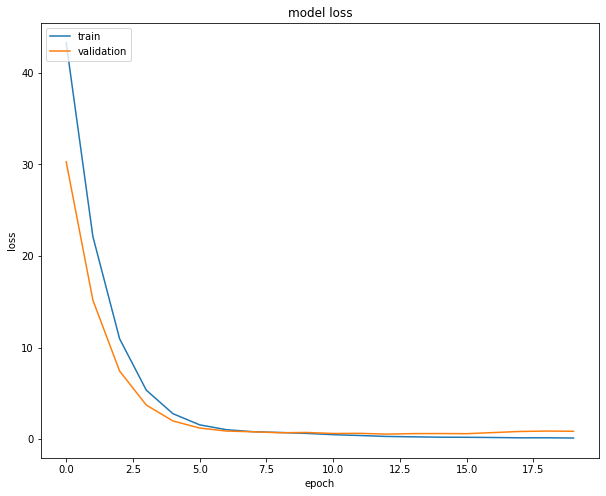

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.savefig('model_Accuracy.png',dpi=600)

plt.show()


plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.savefig('model_loss.png', dpi=600)

plt.show()

In [220]:
sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [221]:
prediction=model2.predict_classes(test_x)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [222]:
prediction[:5]

array([[0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)

In [223]:
prediction_id=test['id']

In [224]:
prediction_id=pd.DataFrame(prediction_id)

In [225]:
prediction_id

,id
0,0
1,2
2,3
3,9
4,11
...,...
3258,10861
3259,10865
3260,10868
3261,10874


In [226]:
prediction=pd.DataFrame(prediction)

In [227]:
prediction.columns=["target"]

In [228]:
prediction

,target
0,0
1,1
2,1
3,1
4,1
...,...
3258,0
3259,1
3260,1
3261,1


In [229]:
res=pd.concat([prediction_id, prediction], axis=1)


In [230]:
sub = res.to_csv('submission.csv', index=False)